<a href="https://colab.research.google.com/github/aloksingh43/EDA-Airbnb-Bookings-Analysis/blob/main/alok_final_colab_of_project__Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##**What is Airbnb?**##
Airbnb,as in "Air Bed and Breakfast",is an online market that lets property owners rent out their spaces to travellers looking for accommodation. Travellers can rent a space for multiple people to share, a shared space with private rooms,or the entire property for themselves.
NYC is the most populous city in the United States, and one of the most popular tourism and business places globally.


**IMPORT** **LIBRARIES**

In [1]:
# import all the packages,that will be required in the project 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline                                        

# **Load the Data**

In [2]:
#Give the path of the folder to access all the csv data files
# past url of your data here
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [3]:
# Let's read the csv file
df_Airbnb= pd.read_csv(url)

# **let's summarize the Dataset**

In [4]:
# check top four rows to get the overview of data
df_Airbnb.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [5]:
# check bottom four rows
df_Airbnb.tail(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
# Let's take information about data
df_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# check description about dataset 
df_Airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# Find the shape of your data
print('Shape of data is:' ,df_Airbnb.shape)

Shape of data is: (48895, 16)


In [9]:
# columns Name
df_Airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# let us check all the null values in our dataset
null_values_in_data=df_Airbnb.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


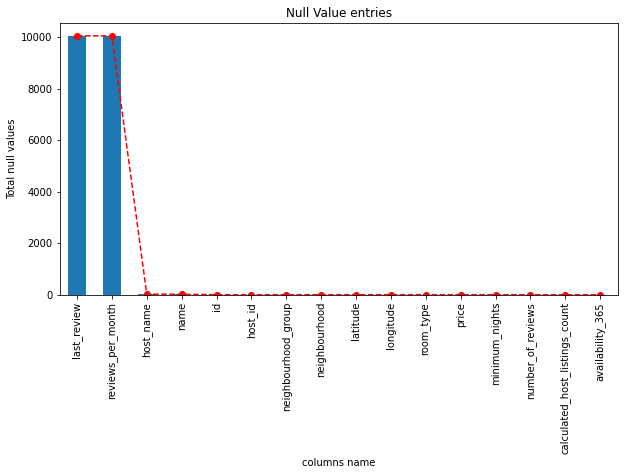

In [11]:
# plot a bar chart of null values
plt.rcParams['figure.figsize']=(10,5)
null_values_in_data.plot(kind='bar')
plt.plot(null_values_in_data,'r--o')
plt.xlabel('columns name')
plt.ylabel('Total null values')
plt.title('Null Value entries');

# **Observation**

> It is clearly visible that 'number_of_reviews' and 'last_review' Columns have highest null values.so we can drop those column as they are not sharing any useful data.
since we have i'ds and names both are available, we can drop the name column also.




# **Data cleaning**

# let's do some data cleaning to get a meaningful relation from the data

To avoid the contamination of our dataframe, first we will make copy of it.


In [12]:
df_Airbnb_copy=df_Airbnb.copy()

In [13]:
df_Airbnb_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


let's remove the column which contain most number of null values and is not holding any important information 

In [14]:
# Drop columns: 'reviews_per_month' and 'last_review'
df_Airbnb_copy.drop(['reviews_per_month','last_review'],axis=1,inplace=True)

In [15]:
# replace null value from host_name column to NOT AVAILABLE

list_of_index_host_name_nullvalues=list(df_Airbnb_copy[pd.isnull(df_Airbnb_copy["host_name"])].index.values)
df_Airbnb_copy.iloc[list_of_index_host_name_nullvalues,[3]] ='NOT AVAILABLE'

In [16]:
#also drop name colume because it is not holding any intact information
df_Airbnb_copy.drop(['name','calculated_host_listings_count'],axis=1,inplace=True)

In [17]:
# check our data set if it is clear or not
null_values_in_data=df_Airbnb_copy.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

id                     0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64


In [18]:
df_Airbnb_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000


In [19]:
# so let's check where price is 0
df_Airbnb_copy[df_Airbnb_copy['price']==0]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
23161,18750597,8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,28
25433,20333471,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,127
25634,20523843,15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0
25753,20608117,1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0
25778,20624541,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,73
25794,20639628,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,176
25795,20639792,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,232
25796,20639914,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,222
26259,20933849,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0
26841,21291569,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,333


In [20]:
mean_value_of_price = df_Airbnb_copy['price'].mean()

In [21]:
price_col = df_Airbnb_copy['price']
price_col.replace(to_replace = 0, value = mean_value_of_price , inplace=True)
df_Airbnb_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.755045,7.029962,23.274466,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.143242,20.510550,44.550582,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000


In [22]:
# check columns
df_Airbnb_copy.columns


Index(['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

In [23]:
#now,let's check the shape again
df_Airbnb_copy.shape

(48895, 12)

# **What can we learn about different hosts and areas?**

first, let's locate the area of our dataset on map.

In [24]:
#let's check the location of our data on map
fig = px.line_mapbox(df_Airbnb_copy, lat="latitude", lon="longitude", color="neighbourhood_group", zoom=1, height=500)
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=7, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

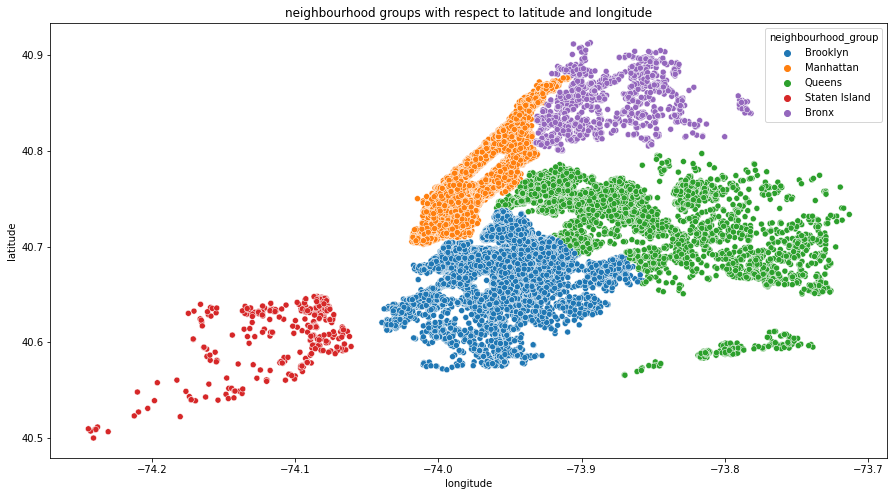

In [25]:
#let's plot the scatter graph to see things more clearly
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_Airbnb_copy.longitude,y=df_Airbnb_copy.latitude,hue=df_Airbnb_copy.neighbourhood_group)
plt.title('neighbourhood groups with respect to latitude and longitude');

There are 5 neighbourhood groups in NYC whose data we have to analyze.we can see,Queens have the largest area in NYC.

In [26]:
listed_areas_by_hosts=df_Airbnb_copy.groupby(['host_id','host_name','neighbourhood_group'])['host_id'].count().sort_values(ascending=False).head(10)
listed_areas_by_hosts


host_id    host_name          neighbourhood_group
219517861  Sonder (NYC)       Manhattan              327
107434423  Blueground         Manhattan              230
30283594   Kara               Manhattan              121
12243051   Sonder             Manhattan               96
16098958   Jeremy & Laura     Manhattan               96
61391963   Corporate Housing  Manhattan               91
22541573   Ken                Manhattan               86
137358866  Kazuya             Queens                  79
200380610  Pranjal            Manhattan               65
1475015    Mike               Manhattan               52
Name: host_id, dtype: int64

Given above are the top 10 hosts available in NYC on the basis of number of properties.

In [27]:
# let's find total number of host in neighbourhood groups
hosts_in_area=df_Airbnb_copy.groupby('neighbourhood_group')['host_id'].count().sort_values(ascending=False).reset_index()
hosts_in_area.rename(columns = {'host_id':'total no. of hosts'}, inplace = True)

In [28]:
hosts_in_area

,neighbourhood_group,total no. of hosts
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


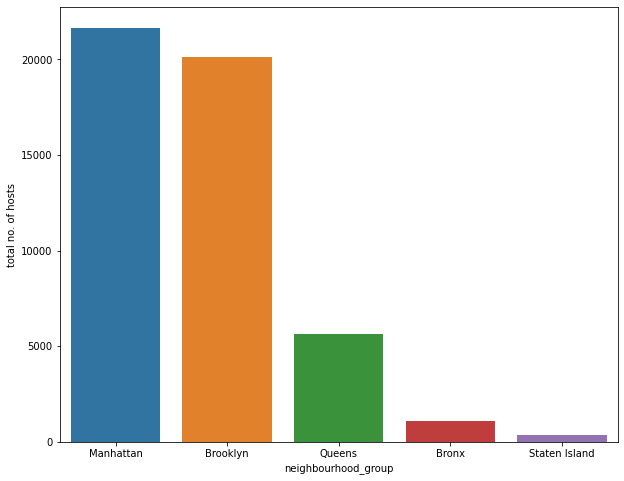

In [29]:
plt.rcParams['figure.figsize']=(10,8)
sns.barplot(x='neighbourhood_group',y='total no. of hosts',data=hosts_in_area);

As we can see most of the hosts are providing accomodation in Manhattan and Brooklyn.let's check what percentage of total neighbourhood group is covered by these two neighbourhood groups.

In [30]:
sum_of_toptwo=hosts_in_area.loc[0]['total no. of hosts']+hosts_in_area.loc[1]['total no. of hosts']
percentage=sum_of_toptwo*100/hosts_in_area['total no. of hosts'].sum()
print('percentage covered by  Manhattan and Brooklyn = ', percentage )

percentage covered by  Manhattan and Brooklyn =  85.41773187442479


It is clear that 85% of the hosts are in Manhattan and Brooklyn only. So 85% of our data must be revolving around them two groups.

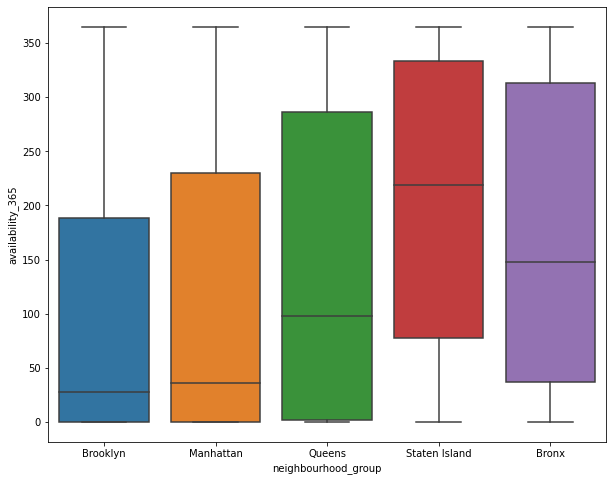

In [31]:
#let's check availability in each neighbourhood group
sns.boxplot(data=df_Airbnb_copy, x='neighbourhood_group',y='availability_365');

Above graph shows that availability to stay is higher in Staten Island and Bronx.But,Number of hosts available in Manhattan and Brooklyn are much higher than Staten Island and Bronx.So, Let's see if the guests are also preferring these neighbourhood groups more.

In [32]:
# which location guests are preferring much
location_prefer_by_guests=df_Airbnb_copy.groupby(['latitude','longitude',"neighbourhood_group"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
location_prefer_by_guests

,latitude,longitude,neighbourhood_group,number_of_reviews
0,40.66730,-73.76831,Queens,629
1,40.82085,-73.94025,Manhattan,607
2,40.82124,-73.93838,Manhattan,597
3,40.82264,-73.94041,Manhattan,594
4,40.66939,-73.76975,Queens,576
...,...,...,...,...
48866,40.77751,-73.94774,Manhattan,0
48867,40.72070,-74.00034,Manhattan,0
48868,40.77752,-73.94726,Manhattan,0
48869,40.77752,-73.94647,Manhattan,0


In [33]:
# plot scatterplot for most number of prefered longitute and latitute by customer to stay
fig = px.scatter(location_prefer_by_guests.head(10), x="latitude", y="longitude",
	         size="number_of_reviews", color="neighbourhood_group",
                log_x=True, size_max=60)
fig.show()


top 10 neighbourhood group's location has been visualized based on the reviews. and we can see that guests are also looking for Manhattan and Brooklyn to stay.

In [34]:
# take an overview of the data after cleaning and removing unnecessary data
selected_data = df_Airbnb_copy.groupby(['host_id','host_name','neighbourhood_group','price','minimum_nights','room_type','availability_365'])['number_of_reviews'].count().reset_index()
selected_data.sort_values(by='number_of_reviews',ascending=False)

,host_id,host_name,neighbourhood_group,price,minimum_nights,room_type,availability_365,number_of_reviews
24003,30283594,Kara,Manhattan,239.0,30,Entire home/apt,352,14
24007,30283594,Kara,Manhattan,239.0,30,Entire home/apt,365,12
43042,205031545,Red Awning,Manhattan,714.0,28,Entire home/apt,257,10
35471,100238132,Michael,Manhattan,339.0,3,Entire home/apt,0,9
3786,1475015,Mike,Manhattan,87.0,30,Entire home/apt,365,8
...,...,...,...,...,...,...,...,...
16098,13219494,New,Brooklyn,125.0,1,Entire home/apt,0,1
16099,13220337,Brian,Manhattan,150.0,3,Entire home/apt,0,1
16100,13221575,Lorie,Bronx,150.0,1,Entire home/apt,88,1
16101,13223221,Tatiana,Brooklyn,75.0,3,Entire home/apt,0,1


In [35]:
# find out the relation between room type,neighbourhood groups and number of reviews
types_of_rooms_in_area=df_Airbnb_copy.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
types_of_rooms_in_area

,neighbourhood_group,room_type,number_of_reviews
0,Brooklyn,Entire home/apt,267128
1,Manhattan,Entire home/apt,235147
2,Brooklyn,Private room,213653
3,Manhattan,Private room,209150
4,Queens,Private room,93561
5,Queens,Entire home/apt,60644
6,Bronx,Private room,16312
7,Bronx,Entire home/apt,11627
8,Manhattan,Shared room,10272
9,Staten Island,Entire home/apt,5857


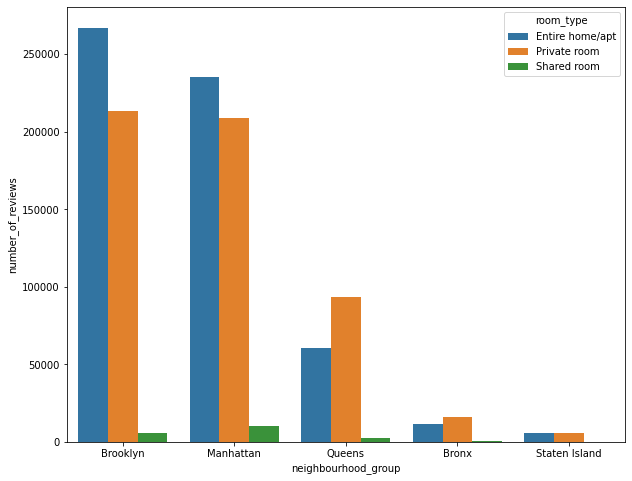

In [36]:
sns.barplot(x='neighbourhood_group',y='number_of_reviews',hue='room_type',data=types_of_rooms_in_area);

This Graph shows that most number of reviews are given to entire home/apt and private rooms while comparing with all the three types of room availability. Let's confirm it via scatter plot with latitude and longitude.

Number of reviews means number of guests that had been to these places.
So we can observe from here that people are preferring entire homes and private rooms more than the sharing rooms. let's check this data further with price,availability and neighbourhoods.

In [37]:
# Check number of reviews with room type
preferred_room_type = df_Airbnb_copy.groupby('room_type')['number_of_reviews'].sum().reset_index()
preferred_room_type

,room_type,number_of_reviews
0,Entire home/apt,580403
1,Private room,538346
2,Shared room,19256


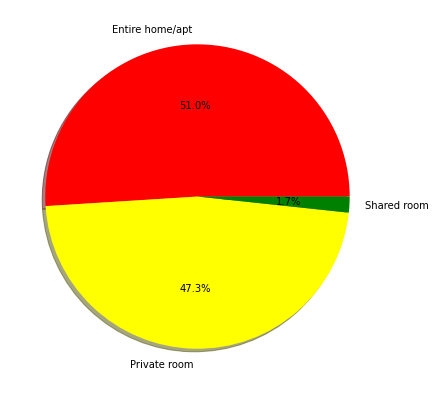

In [38]:
#let's make the pie chart of the above data
fig = plt.figure(figsize =(10, 7))
plt.pie(preferred_room_type.number_of_reviews, labels =preferred_room_type.room_type,autopct='%1.1f%%', shadow = True,colors=['red','yellow','green']);

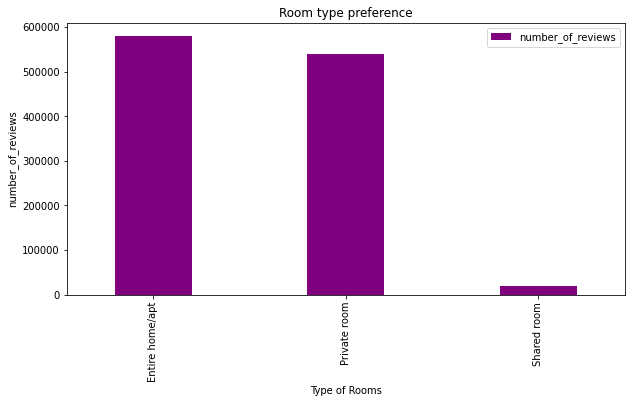

In [39]:
# let's plot bar chart for room type and number of reviews 
preferred_room_type.set_index('room_type',inplace=True)
preferred_room_type.plot(kind='bar',width=.4 ,color=['purple'],figsize = (10, 5));
plt.xlabel("Type of Rooms")
plt.ylabel("number_of_reviews")
plt.title("Room type preference");

Now this bar chart has made the things quite clear that in all the neighbourhood groups, entire homes and private rooms are used more frequently.now let's check the type of room's behaviour with prices.

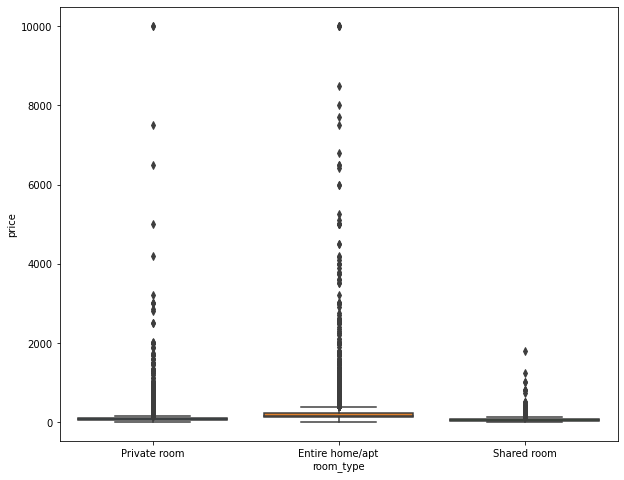

In [40]:
# let's plot a box plot for room type and it's variation in price
sns.boxplot(data=df_Airbnb_copy, x="room_type", y="price");



1.  Most of the private rooms are within the price range of 2000 and outlier for private room is 10000.
2.  In entire home/apt are approximately within the range of 3000 and outlier for this is also 10000
3. Shared rooms prices are in range of approximately 500 and outlier for this is 1800



So Availability is maximum in Staten Island and Bronx.

Let's find out average pricing of Rooms

In [41]:
# find the average price of all types of rooms 
avg_price_for_room_type=df_Airbnb_copy.groupby(['room_type'])['price'].mean().reset_index()
avg_price_for_room_type.rename(columns = {'price':'average_price'}, inplace = True)
avg_price_for_room_type

,room_type,average_price
0,Entire home/apt,211.806267
1,Private room,89.828856
2,Shared room,70.390898


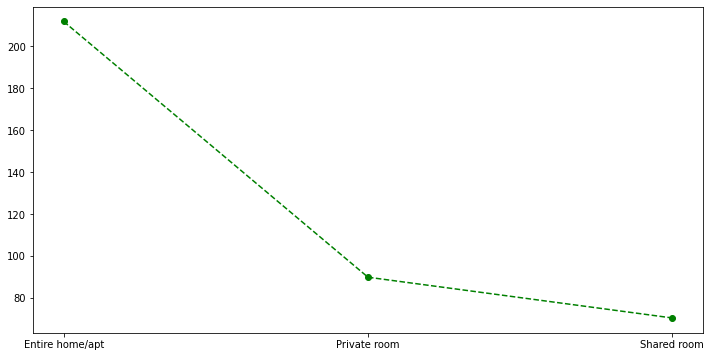

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(avg_price_for_room_type.room_type,avg_price_for_room_type.average_price, marker='o', c='g',ls='--');

In [43]:
# let's plot pie chart for the above Data
labels = list(avg_price_for_room_type.room_type)
values = list(avg_price_for_room_type.average_price)

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.1])])
fig.show()

Price for entire homes are remarkably higher than other two types of room but still most number of reviews are given to entire homes. That means guests are not affected by prices much.
From this,We can also conclude that people travelling to New York are prioritizing comfort and privacy over cheapness.
lets check the price behaviour with other data to strengthen our conclusion.

In [44]:
#average price and neighbourhood group relation
avg_price_for_area=df_Airbnb_copy.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False).reset_index()
avg_price_for_area.rename(columns = {'price':'average_price'}, inplace = True)
avg_price_for_area

,neighbourhood_group,average_price
0,Manhattan,196.882864
1,Brooklyn,124.451576
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.636774


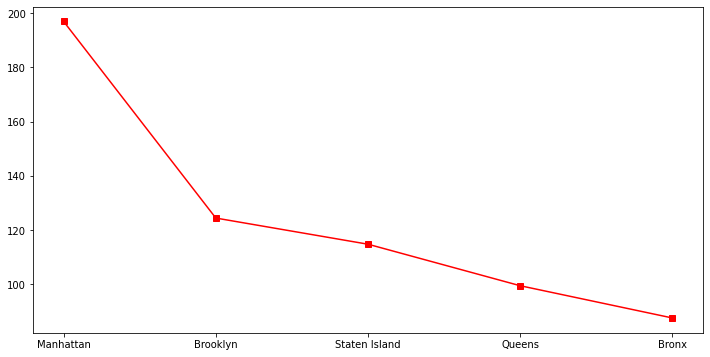

In [45]:
# plot a line chart which make connection between average price and neighbourhood_group
plt.figure(figsize=(12, 6))
plt.plot(avg_price_for_area.neighbourhood_group,avg_price_for_area.average_price, marker='s', c='r',ls='-');

In [46]:
# plot avg price for area
labels = list(avg_price_for_area.neighbourhood_group)
values = list(avg_price_for_area.average_price)

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.1,0.1])])
fig.show()

On the basis of price also, It is visible that Manhattan and Brooklyn are expensive ones yet most number of reviews and number of hosts are present in these regions only.

In [47]:
# let's check price preferred by guests
price_prefer_guests =df_Airbnb_copy.groupby('price')['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(10)
price_prefer_guests

,price,number_of_reviews
0,100.0,40293
1,150.0,36196
2,60.0,32096
3,65.0,30292
4,75.0,29590
5,50.0,29069
6,80.0,28313
7,99.0,27745
8,125.0,27180
9,120.0,27055


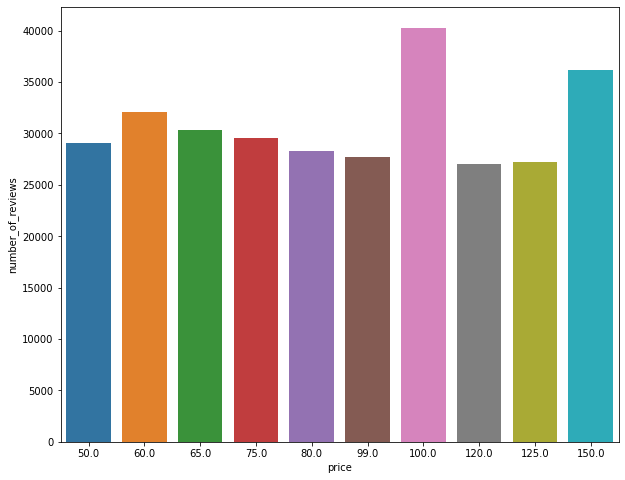

In [48]:
sns.barplot(x='price',y='number_of_reviews',data=price_prefer_guests);


Number of reviews for price 50 to 150 are greater than 25000.This means most of the guests are comfortable in the price range of 50-150.

# **let's check the price behaviour, according to neighbourhood also**

In [49]:
# now find expensive neighbourhood
expensive_neighbourhood=df_Airbnb_copy.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).reset_index().head(20)
expensive_neighbourhood.rename(columns = {'price':'average_price'}, inplace = True)
expensive_neighbourhood

,neighbourhood,average_price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909
5,Prince's Bay,409.500000
6,Battery Park City,367.557143
7,Flatiron District,341.925000
8,Randall Manor,336.000000
9,NoHo,295.717949


In [50]:
# print price variation 
fig = px.bar(expensive_neighbourhood, x='neighbourhood', y='average_price',color='average_price')
fig.show()


So the most expensive neighbourhoods are Fort Wadsworth and Woodrow.let,s check how many hosts are available in these neighbourhood.

In [51]:
neighbourhood_in_neighbourhoodgroups = df_Airbnb_copy.groupby(['neighbourhood_group','neighbourhood'])['host_id'].count().sort_values(ascending=False).reset_index()
neighbourhood_in_neighbourhoodgroups.rename(columns = {'host_id':'number of hosts'}, inplace = True)
neighbourhood_in_neighbourhoodgroups

,neighbourhood_group,neighbourhood,number of hosts
0,Brooklyn,Williamsburg,3920
1,Brooklyn,Bedford-Stuyvesant,3714
2,Manhattan,Harlem,2658
3,Brooklyn,Bushwick,2465
4,Manhattan,Upper West Side,1971
...,...,...,...
216,Staten Island,Richmondtown,1
217,Staten Island,New Dorp,1
218,Staten Island,Fort Wadsworth,1
219,Staten Island,Willowbrook,1


In [52]:
#plot top 20 neighbourhood and number of hosts 
fig = px.histogram(neighbourhood_in_neighbourhoodgroups.head(20), x="neighbourhood", y="number of hosts",
             color='neighbourhood_group',
             height=400)
fig.show()

In [53]:
least_host_in_neighbourhood=neighbourhood_in_neighbourhoodgroups.tail(5)
least_host_in_neighbourhood

,neighbourhood_group,neighbourhood,number of hosts
216,Staten Island,Richmondtown,1
217,Staten Island,New Dorp,1
218,Staten Island,Fort Wadsworth,1
219,Staten Island,Willowbrook,1
220,Staten Island,Woodrow,1


In [54]:
fig = px.bar(least_host_in_neighbourhood, y='number of hosts', x='neighbourhood', text_auto='',
            title="least_no_host_in_neighbourhood")
fig.show()

We can conclude from here that the value of hosts available in expensive neighbourhood is almost null. let's see which neighbourhood is visited by guests most.

In [55]:
mostreviewed_neighbourhood=df_Airbnb_copy.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
mostreviewed_neighbourhood

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352
1,Williamsburg,85427
2,Harlem,75962
3,Bushwick,52514
4,Hell's Kitchen,50227
...,...,...
216,Breezy Point,5
217,"Bay Terrace, Staten Island",3
218,New Dorp,0
219,Woodrow,0


In [56]:
# let's plot a bar chart for most reviewed neighbourhood
fig = px.bar(mostreviewed_neighbourhood.head(20), x='neighbourhood', y='number_of_reviews',color='number_of_reviews')
fig.show()


From above collected data, it is concluded that number of hosts available in top 20 neighbourhood are most reviewed also. Along with that expensive neighbourhoods are neither preferred by hosts nor guests. 


# **Summarizing the collected data**

*   Most number of hosts are available in Manhattan and Brooklyn.
*   Hosts are also listed in mid price neighbourhoods as we can see that the expensive neighbourhoods have 1 or 2 hosts.


*   Reviews given by the visitors include a lot of important factors like cleanliness,attentiveness, behaviour, concern for the guests,easy availibility to transportation and so on. so with the number of reviews we can find out hosts and areas preferred by guests.
*   Guests are preferring the price range of 50-150. types of rooms they want is either entire home/apt or private rooms. least of the preference is given to shared rooms.


*   Brooklyn have less neighbourhoods but most hosts, that means that Brooklyn must be the busiest area and one can face traffic while travelling to Brooklyn.






